In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.signal import fftconvolve

In [5]:
# Setup constants
kb = 1.38065*10**-26
T = 400
Na = 6.022*10**23
Beta = 1/(Na*kb*T)
# print(Beta)

In [6]:
# Setup grids and so on....
pts = 120
# gridmax = 14
# dx = gridmax/(pts)
# grid = np.arange(0,gridmax,dx)+dx

In [53]:
# Hard wall at x = 10 & 90
v_ext = np.zeros(pts)
v_ext[:10] = 1000
# v_ext[110:] = 1000

In [54]:
# define packing fraction and radius
# THis defines the system density etc...
packing_fraction = 0.3
radius = 5

# bulk density is determined from above
rho_bulk = 3*packing_fraction / (4.0*np.pi*radius**3)
print('radius=', radius)
print('bulk rho=', rho_bulk)
print('packing fraction=', packing_fraction)


radius= 5
bulk rho= 0.0005729577951308232
packing fraction= 0.3


In [63]:
# Define w's
a = np.arange(-radius, radius+1)

w3 = np.pi*(radius**2-a**2)

w2_vec = 0

w2 = 2*np.pi*radius*np.ones(2*radius+1)
w2[0]  = np.pi*radius
w2[-1] = np.pi*radius

w1_vec = 0

w1 = w2/(4*np.pi*radius)

w0 = w2/(4*np.pi*radius**2)

print(w3)

[  0.          28.27433388  50.26548246  65.97344573  75.39822369
  78.53981634  75.39822369  65.97344573  50.26548246  28.27433388   0.        ]


In [62]:
# Hard contribution to the chemical potential via convolution 
rho = np.ones(pts)*rho_bulk

n0 = np.convolve(rho, w0, mode='valid')
n1 = np.convolve(rho, w1, mode='valid')
n2 = np.convolve(rho, w2, mode='valid')
n3 = np.convolve(rho, w3, mode='valid')
print(n0,n1,n2,n3)

[ 0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296  0.00057296
  0.00057296  0.00057296  0.00057296  0.00057296  0

In [149]:
# Ideal helmholtz free energy
# def F_id(rho):
#     return np.sum(rho*(np.log(rho)-1))*dx/Beta

In [197]:
# External Helmholtz free energy
def V_ext(rho):
    return np.sum(v_ext*rho)

In [263]:
def mu_id(rho):
    return np.sum(rho*np.log(rho))

def mu_ex(rho):
    y = packing/(1-packing) + np.log(1-bulk_rho)
    return np.sum(rho*y)

In [264]:
# Fundamental Measure Theory (1D)
def vector_n0(rho):
    conv_vector = np.zeros(2*Radii+1) #Convolution vector
    conv_vector[0] = 1
    conv_vector[-1] = 1
    n0 = 0.5*np.convolve(rho, conv_vector)
    return n0

def vector_n1(rho):
    conv_vector = np.ones(2*Radii+1) #Convolution vector
    n1 = np.convolve(rho, conv_vector)
    np.clip(n1, 0, 1-(1e-16), out=n1)
    return n1

def F_exc(rho):
    n0 = vector_n0(rho)
    n1 = vector_n1(rho)
    y = -np.sum(n0*np.log(1-n1))
    return y

# Ideal helmholtz free energy
def F_id(rho):
    return np.sum(rho*(np.log(rho)-1))

def F_tot(rho):
    return V_ext(rho)+F_id(rho)+F_exc(rho)+mu_id(rho)+mu_ex(rho)

0.05


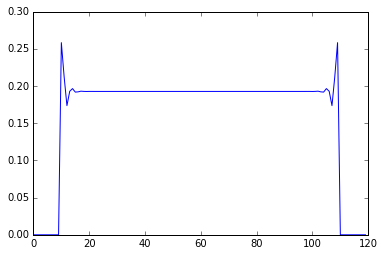

In [309]:
Radii = 1
packing = 0.1
bulk_rho = packing/(2*Radii)
print(bulk_rho)

rho = np.zeros(pts)+bulk_rho

res = minimize(F_tot, rho, bounds=[(1e-16,None)]*pts)
plt.plot(res.x)


In [303]:
# # Picard Iteration
# rho = np.zeros(pts)+0.01
# Radii = 1
# alpha = 0.1

# for i in range(0,10):
#     print(rho)
#     rho = (1-alpha)*rho + rho*alpha*np.exp(F_ext(rho)+F_1d(rho))

In [304]:
# Max density = 1/2R

In [305]:
# Number of particles
print(np.sum(res.x))

6.66065355644


In [293]:
vector_n1(res.x)

array([  1.00000000e-16,   2.00000000e-16,   3.00000000e-16,
         4.00000000e-16,   5.00000000e-16,   5.00000000e-16,
         5.00000000e-16,   5.00000000e-16,   5.00000000e-16,
         5.00000000e-16,   2.05543673e-01,   3.80284680e-01,
         5.28317377e-01,   6.53475616e-01,   7.58795407e-01,
         6.80041835e-01,   6.40641990e-01,   6.29527847e-01,
         6.38795613e-01,   6.62923399e-01,   6.65323471e-01,
         6.60402440e-01,   6.55058334e-01,   6.52633686e-01,
         6.54689786e-01,   6.56597294e-01,   6.57178324e-01,
         6.56723267e-01,   6.55996945e-01,   6.55798926e-01,
         6.55962141e-01,   6.56173723e-01,   6.56252290e-01,
         6.56191123e-01,   6.56117025e-01,   6.56093325e-01,
         6.56113320e-01,   6.56141731e-01,   6.56151970e-01,
         6.56146459e-01,   6.56138970e-01,   6.56138742e-01,
         6.56146176e-01,   6.56155865e-01,   6.56163074e-01,
         6.56166075e-01,   6.56165874e-01,   6.56164188e-01,
         6.56162526e-01,

In [157]:
np.argmax(np.cumsum(res.x)>1)

15